In [133]:
%pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 199 kB 3.2 MB/s            
     |████████████████████████████████| 31.2 MB 29.6 MB/s            
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.


In [135]:
import torch
from torch import Tensor
from torch import nn
import pandas as pd
import numpy as np
import random
import warnings
warnings.filterwarnings('ignore')

In [249]:
df = pd.read_excel("GNN_data_f.xlsx", engine='openpyxl', index_col=False)
df = df.drop(df.columns[[0]], axis=1)  
df

,Chr_x,Gene symbol,loc,z-score,int_size,eqtl_genes,DISEASE/TRAIT,l_break,r_break,seq
0,chr19,-,47774772,1.641685e+07,NaN,"['ENSG00000105321', 'ENSG00000197405', 'ENSG00...",NaN,47774272,47775272,AGGCAGGAAGCCCCTTCCTCCTGTCTACTCTCCACCCAGGCATCAC...
1,chr18,SMAD4,48609968,4.044151e+06,NaN,"['ENSG00000141646', 'ENSG00000082212', 'ENSG00...",NaN,48609468,48610468,TGAAAGGTTTCATTGCTTCCACTTGAATGCTGCTCTTACAAAAACT...
2,chr18,SMAD4,48610474,4.044151e+06,NaN,NaN,NaN,48609974,48610974,AAAGTAATGGCTCTGGGTTGGGCCAGACAGTTGCACTCTCTAGTTT...
3,chr1,-,212459056,1.049522e+06,412.0,NaN,NaN,212458556,212459556,CTCACGCCGTCGCTGCCGCTTAGCCGTGTGATTGGCTAAGAGGGCT...
4,chr15,NR2F2,96873540,9.413342e+05,NaN,NaN,NaN,96873040,96874040,GAAAATTGATTCTAATTGCATCATGACAATCAGATGAAGTCTATTT...
...,...,...,...,...,...,...,...,...,...,...
7785,chr12,BCAT1,24965636,9.017178e+00,NaN,NaN,NaN,24965136,24966136,TGAGGAAACTGCAATGTGTTATTGCACATTTTAGTTAAAAACTAAT...
7786,chr4,-,83345632,8.958757e+00,NaN,['ENSG00000145293'],NaN,83345132,83346132,AAACATTTTGTTCAATCTTGTGGCGGCTCTGAGAAAACACAACTAA...
7787,chr12,-,27182338,8.381627e+00,NaN,"['ENSG00000111790', 'ENSG00000152944', 'ENSG00...",NaN,27181838,27182838,TCTGAGCTTTGAGCAAGAAAGTTTTGGAAATTGTGTTGCTTTTAAG...
7788,chr12,VEZT,95696030,8.337806e+00,NaN,NaN,NaN,95695530,95696530,TCTATGTTGCTGTCCTAGAAAGGAAATTGCATGATGAATCTAGATT...


In [251]:
df["target"] = ((df["z-score"] >= 200) & (~df["eqtl_genes"].isna())) * 1
df["target"].sum()

1215

In [252]:
df_new = pd.DataFrame()
df_new['id'] = df['Chr_x'] + '_' + df['loc'].apply(str)
df_new['data'] = df['seq']
df_new['target'] = df['target']
df_new

,id,data,target
0,chr19_47774772,AGGCAGGAAGCCCCTTCCTCCTGTCTACTCTCCACCCAGGCATCAC...,1
1,chr18_48609968,TGAAAGGTTTCATTGCTTCCACTTGAATGCTGCTCTTACAAAAACT...,1
2,chr18_48610474,AAAGTAATGGCTCTGGGTTGGGCCAGACAGTTGCACTCTCTAGTTT...,0
3,chr1_212459056,CTCACGCCGTCGCTGCCGCTTAGCCGTGTGATTGGCTAAGAGGGCT...,0
4,chr15_96873540,GAAAATTGATTCTAATTGCATCATGACAATCAGATGAAGTCTATTT...,0
...,...,...,...
7785,chr12_24965636,TGAGGAAACTGCAATGTGTTATTGCACATTTTAGTTAAAAACTAAT...,0
7786,chr4_83345632,AAACATTTTGTTCAATCTTGTGGCGGCTCTGAGAAAACACAACTAA...,0
7787,chr12_27182338,TCTGAGCTTTGAGCAAGAAAGTTTTGGAAATTGTGTTGCTTTTAAG...,0
7788,chr12_95696030,TCTATGTTGCTGTCCTAGAAAGGAAATTGCATGATGAATCTAGATT...,0


In [253]:
df_new[[str(i) for i in range(1001)]] = df_new['data'].apply(lambda x: ' '.join(x)).str.split(' ', 1001, expand=True)
x = df_new['data'].apply(lambda x: ' '.join(x)).str.split(' ', 1001, expand=True)
df_new

,id,data,target,0,1,2,3,4,5,6,...,991,992,993,994,995,996,997,998,999,1000
0,chr19_47774772,AGGCAGGAAGCCCCTTCCTCCTGTCTACTCTCCACCCAGGCATCAC...,1,A,G,G,C,A,G,G,...,C,T,C,T,C,T,T,G,G,G
1,chr18_48609968,TGAAAGGTTTCATTGCTTCCACTTGAATGCTGCTCTTACAAAAACT...,1,T,G,A,A,A,G,G,...,A,T,T,G,C,G,T,G,C,A
2,chr18_48610474,AAAGTAATGGCTCTGGGTTGGGCCAGACAGTTGCACTCTCTAGTTT...,0,A,A,A,G,T,A,A,...,T,T,G,T,C,A,T,T,G,A
3,chr1_212459056,CTCACGCCGTCGCTGCCGCTTAGCCGTGTGATTGGCTAAGAGGGCT...,0,C,T,C,A,C,G,C,...,C,G,C,A,G,A,G,G,C,A
4,chr15_96873540,GAAAATTGATTCTAATTGCATCATGACAATCAGATGAAGTCTATTT...,0,G,A,A,A,A,T,T,...,C,G,C,G,G,T,G,T,G,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7785,chr12_24965636,TGAGGAAACTGCAATGTGTTATTGCACATTTTAGTTAAAAACTAAT...,0,T,G,A,G,G,A,A,...,T,G,T,T,T,C,A,T,T,A
7786,chr4_83345632,AAACATTTTGTTCAATCTTGTGGCGGCTCTGAGAAAACACAACTAA...,0,A,A,A,C,A,T,T,...,C,A,C,T,T,T,A,T,T,T
7787,chr12_27182338,TCTGAGCTTTGAGCAAGAAAGTTTTGGAAATTGTGTTGCTTTTAAG...,0,T,C,T,G,A,G,C,...,A,C,T,A,A,C,A,G,G,A
7788,chr12_95696030,TCTATGTTGCTGTCCTAGAAAGGAAATTGCATGATGAATCTAGATT...,0,T,C,T,A,T,G,T,...,A,A,T,G,A,G,C,C,A,T


In [254]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit([['A' for i in range(1001)],['C' for i in range(1001)],['T' for i in range(1001)],['G' for i in range(1001)]])
xnew = enc.transform(x).toarray()
xnew


/home/jupyter/.local/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator OneHotEncoder from version 0.22.1 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [255]:
df_res = df_new[['id', 'target']]
for i in range(4004):
    df_res[str(i)] = xnew[:, i]
df_res

<ipython-input-7-069ca259acc5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_res[str(i)] = xnew[:, i]


,id,target,0,1,2,3,4,5,6,7,...,3994,3995,3996,3997,3998,3999,4000,4001,4002,4003
0,chr19_47774772,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,chr18_48609968,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,chr18_48610474,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,chr1_212459056,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,chr15_96873540,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7785,chr12_24965636,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7786,chr4_83345632,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7787,chr12_27182338,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
7788,chr12_95696030,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [256]:
df_res.to_csv('data_new_expr.csv')

In [257]:
df = pd.read_csv('data_new_expr.csv')
df = df.sample(frac=1)
df

,Unnamed: 0,id,target,0,1,2,3,4,5,6,...,3994,3995,3996,3997,3998,3999,4000,4001,4002,4003
5673,5673,chr7_158897286,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4400,4400,chr19_5933709,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1434,1434,chr21_35514994,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1913,1913,chr8_82565340,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1074,1074,chr19_12902377,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2938,2938,chr3_196461908,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
6684,6684,chr11_74719511,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5811,5811,chr19_4859937,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6989,6989,chr6_135286230,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [258]:
X = df[[str(i) for i in range(4004)]]
y = df['target']
X = np.array(X)
y = np.array(y)

In [366]:
train_size = 5000
X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]

In [367]:
from imblearn.over_sampling import SMOTE

In [368]:
def set_random_seed(seed):
    torch.backends.cudnn.deterministic = True
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

In [369]:
set_random_seed(512)

In [381]:
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

learning_rate = 0.001
batch_size = 1000
num_epochs = 50


class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return {'sample': self.x[idx], 'target': self.y[idx, None]}

In [382]:
X_train_scale = X_train
X_test_scale = X_test
y_train_scale = y_train
y_test_scale = y_test

# smote_model = SMOTE(sampling_strategy=1.0)
# X_train_scale, y_train_scale = smote_model.fit_resample(X_train_scale, y_train_scale)

In [383]:
train_set = MyDataset(X_train_scale, y_train_scale)
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)

test_set = MyDataset(X_test_scale, y_test_scale)
test_loader = DataLoader(test_set, batch_size=batch_size)

class MyNet(nn.Module):

    def __init__(self):
        super(MyNet, self).__init__()
        self.linear = nn.Sequential(
           nn.Linear(4004, 512),
           nn.Dropout(p=0.7),
           nn.ReLU(),
           nn.Linear(512, 256),
           nn.Dropout(p=0.7),
           nn.ReLU(),
           nn.Linear(256, 256),
           nn.Dropout(p=0.7),
           nn.ReLU(),
           nn.Linear(256, 1)
        )

    def forward(self, X):
        return torch.sigmoid(self.linear(X))

model = MyNet()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 
criterion = torch.nn.BCELoss()


In [384]:
def train(model, optimizer, criterion, train_loader, test_loader):
    '''
    params:
        model - torch.nn.Module to be fitted
        optimizer - model optimizer
        criterion - loss function from torch.nn
        train_loader - torch.utils.data.Dataloader with train set
        test_loader - torch.utils.data.Dataloader with test set
                      (if you wish to validate during training)
    '''
    train_epoch_loss = []
    test_epoch_loss = []
    for e in range(num_epochs):
      batch_loss = []
      for batch in train_loader:
        batch_X = batch['sample'].float()
        batch_y = batch['target'].float()
        preds = model(batch_X)
        loss = criterion(preds, batch_y)
        loss.backward() 
        optimizer.step() 
        optimizer.zero_grad()
        batch_loss.append(loss.item())
      model.eval()
      train_epoch_loss.append(np.mean(np.sqrt(batch_loss)))
      with torch.no_grad(): 
          test_loss = 0
          ln = 0
          for batch_ in test_loader:
              batch_X = batch_['sample'].float()
              batch_y = batch_['target'].float()
              test_preds = model(batch_X)
              ln += len(batch_y)
              test_loss += np.sum(test_preds.reshape(-1).detach().numpy().round() == batch_y.detach().numpy()[:, 0])
      test_epoch_loss.append(test_loss / ln)
      model.train()
    gfg1 = sns.lineplot(y=train_epoch_loss, x=list(range(len(train_epoch_loss))))
    gfg1.set(xlabel ="Эпоха обучения", ylabel = "BCE Loss батчей на трейне")
    plt.show()
    gfg2 = sns.lineplot(y=test_epoch_loss, x=list(range(len(test_epoch_loss))))
    gfg2.set(xlabel ="Эпоха обучения", ylabel = "Accuracy на тесте")
    plt.show()

def test(model, criterion, test_loader):
    '''
    params:
        model - torch.nn.Module to be evaluated on test set
        criterion - loss function from torch.nn
        test_loader - torch.utils.data.Dataloader with test set
    ----------
    returns:
        predicts - torch.tensor with shape (len(test_loader.dataset), ),
                   which contains predictions for test objects
    '''
    model.eval()
    predicts = []
    with torch.no_grad(): 
        test_loss = 0
        ln = 0
        for batch_ in test_loader:
            batch_X = batch_['sample'].float()
            batch_y = batch_['target'].float()
            test_preds = model(batch_X)
            predicts.extend(test_preds.reshape(-1).detach().numpy())
            ln += len(batch_y)
            test_loss += np.sum(test_preds.reshape(-1).detach().numpy().round() == batch_y.detach().numpy()[:, 0])
        print('Accuracy на тесте: ', test_loss / ln)
    return torch.tensor(predicts)

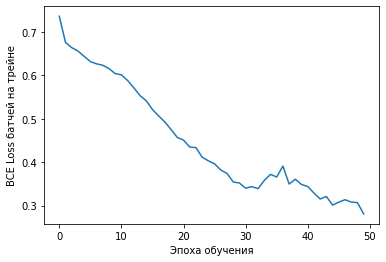

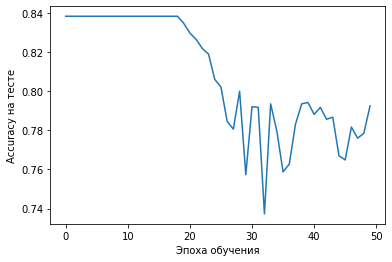

Accuracy на тесте:  0.7924731182795699


In [385]:
# Первый график - средний Accuracy батчей на трейне по эпохам обучения (на отскейленном таргете)
# Второй график - честный Accuracy на всей тестовой выборке по эпохам обучения (на изначальном таргете)

train(model, optimizer, criterion, train_loader, test_loader)
preds = test(model, criterion, test_loader)

In [386]:
res = pd.DataFrame([np.array(preds), y_test_scale]).T
sum(np.array(preds.round()))

280.0

In [387]:
roc_auc_score(y_test_scale, np.array(preds))

0.6182385066106482

In [388]:
from sklearn.metrics import precision_score

precision_score(y_test_scale, np.array(preds.round()), average='binary')

0.2714285714285714